<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Первым делом ознакомимся с данными.

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Первое, что мы видим - это пропущенные значения в 14 столбцах. Где-то их количество совсем небольшое(как например в столбце 'floors_total', а где-то составляет больше 85%(как в столбце 'is_apartment'). Также, мы видим, что можно переименовать некоторые столбцы для большего удобства и понимания, что в них находится. Ещё можно заменить, что некоторые столбцы имеют тип float и object, хотя должны быть int, с ними мы тоже разберёмся. 


Мы изучили данные, пора приступать к предобработке.

## Предобработка данных

Первым делом изменим название столбцом для удобства и лучшего их понимания.

In [5]:
df = df.rename(columns = {"studio": "is_studio",
                          "open_plan": "is_open_plan",
                          "locality_name": "city",
                          "airports_nearest": "distance_to_airport",
                          "cityCenters_nearest": "distance_to_center",
                          "parks_nearest": "distance_to_park",
                          "ponds_nearest": "distance_to_pond"
                         })

Следующим шагом мы должны избавиться от пропущенных значений. Чтобы точно понять, как поступить с пропущенными значениями(удалить/заменить/оставить), нам нужно узнать, какого рода пропуски и как именно они влияют на данные.

Первые пропуски встречаются в столбце ceiling_height, он отвечает за высоту потолков. Мы ещё точно не знаем, можно ли заполнить данные медианными или средними значениями, так как высота потолков у студии и трехкомнатной квартиры может отличаться. Для начала найдем среднюю и медианную высоту потолков в известных нам помещениях.

In [6]:
print(df[df['ceiling_height'].notnull() & df['is_apartment'].notnull()]['ceiling_height'].mean())
df[df['ceiling_height'].notnull() & df['is_apartment'].notnull()]['ceiling_height'].median()

2.9551020408163264


2.7

In [7]:
print(df[df['ceiling_height'].notnull() & df['is_studio'].notnull()]['ceiling_height'].mean())
df[df['ceiling_height'].notnull() & df['is_studio'].notnull()]['ceiling_height'].median()

2.7714988968560403


2.65

In [8]:
print(df[df['ceiling_height'].notnull() & df['is_open_plan'].notnull()]['ceiling_height'].mean())
df[df['ceiling_height'].notnull() & df['is_open_plan'].notnull()]['ceiling_height'].median()

2.7714988968560403


2.65

In [9]:
df['ceiling_height'].median()

2.65

Как мы видим, средние не сильно отличается от медианы, а также высота потолков во всех типах зданий приблизительно равна, поэтому приминмаем решение заполнить пропуски в этом столбце медианными значениями.

In [10]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)

Далее заменим пропуски в living_area. Сделаем мы это путем заполнения средних значений по количеству комнат, поскольку логично, что жилая площадь студии будет меньше, чем жилая площадь трёхкомнатной квартиры.

In [11]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))

Пропуски в kitchen_area заменим по принципу выше.

In [12]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform('median'))

Далее заменим пропуски в столбце balcony. Есть предположение, что NaN в данном столбце отражает отсутствие балкона. Поскольку данный столбец не сильно повлияет на дальнейшие рассчёты, заменим в нём пропуски на количество балконов: 0.

In [13]:
df['balcony'] = df['balcony'].fillna(0)

Далее обработаем пропущенные значения в столбце city. Если название города не выбрано, то заменяем его на 'город не выбран'. Также, чтобы избежать дубликатов, заменим ё на е.

In [14]:
df['city'] = df['city'].str.replace('ё', 'е')
df['city'] = df['city'].fillna('город не выбран')

Далее обработаем пропущенные значения в столбце distance_to_airport. Если расстояние до аэропорта не указано(а посомтрев на df можно понять, что почти все NaN - это деревни/посёлки), то заменяем его на 0, что будет значить 'аэропорт отсутствует'. По такому же принципу заполняем и distance_to_center, parks_around3000, distance_to_park, ponds_around3000, distance_to_pond.

In [15]:
df['distance_to_airport'] = df['distance_to_airport'].fillna(0)
df['distance_to_center'] = df['distance_to_center'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['distance_to_park'] = df['distance_to_park'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['distance_to_pond'] = df['distance_to_pond'].fillna(0)

Также избавимся от пропусков в столбце is_apartment. Есть предположение, что NaN в данном столбце отражают то, что квартира не является апартаментами, поскольку данный столбец не пригодится нам для дальнейшего анализа, возьмем данное предположение за основу и исправим пропущенные значения на False.

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [17]:
# замена пропусков
dz = df
dz['days_exposition'] = dz['days_exposition'].fillna(0)
# подсчёт пропусков
dz['days_exposition'].isna().sum()
# конвертация строки в дату
dz['first_day_exposition'] = pd.to_datetime(dz['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
# сводная таблица количества нулевых значений в разрезе годов подачи объявления
dz.query('days_exposition==0').pivot_table(index=dz['first_day_exposition'].dt.year, values = 'days_exposition', aggfunc='count')

Все оставшиеся пропущенные значения считаем несущественными и удаляем, так как их доля от общего объема данных составляет не больше 3%.

In [20]:
df = df.dropna().reset_index(drop=True)

Когда мы разобрались с пропусками, пришло время изменить типы данных. В превую очередь изменим тип там, где мы проводили замену пропусков. Далее сделаем это в тех столбцах, где это необходимо. Например last_price, floors_total, days_exposition имеют тип float, а нужен int, поскольку они хранят в себе целые значения. В столбце is_apartment хранятся значения True и False, которые являются булевыми, поэтому изменим тип object на bool. Также столбц first_day_exposition хранит дату публикации, поэтому изменияем тип на datetime64. Остальные же столбцы оставим в тех типах, в которых они есть.

In [21]:
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df['distance_to_airport'] = df['distance_to_airport'].astype('int')
df['distance_to_center'] = df['distance_to_center'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['distance_to_park'] = df['distance_to_park'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['distance_to_pond'] = df['distance_to_pond'].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

В этом блоке мы проделали большую работу: переименовали столбы, чтобы улучшить стиль и понимание того, что они занчат, заменили пропуски там, где это необходимо и корректно, а также изменили типы данных на более удобные для нашего дальнейшего исследования.

Можно сказать, что большинство пропущенных значений имеют следующие причины:
- некорректное заполнение данных в изначальном их формате
- человеческий фактор(NaN вместо 0 и т.п)
- повреждение данных при выгрузке

Завершим нашу предобработку, взглянем на датафрейм ещё раз.

In [22]:
display(df.head())
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,city,distance_to_airport,distance_to_center,parks_around3000,distance_to_park,ponds_around3000,distance_to_pond,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863,16028,1,482,2,755,0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2.0,поселок Шушары,12817,18603,0,0,0,0,81
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,9.5,0.0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856,8098,2,112,1,48,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23419 entries, 0 to 23418
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23419 non-null  int64         
 1   last_price            23419 non-null  int64         
 2   total_area            23419 non-null  float64       
 3   first_day_exposition  23419 non-null  datetime64[ns]
 4   rooms                 23419 non-null  int64         
 5   ceiling_height        23419 non-null  float64       
 6   floors_total          23419 non-null  int64         
 7   living_area           23419 non-null  float64       
 8   floor                 23419 non-null  int64         
 9   is_apartment          23419 non-null  bool          
 10  is_studio             23419 non-null  bool          
 11  is_open_plan          23419 non-null  bool          
 12  kitchen_area          23419 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Рассчитаем стоимость квадратного метра. Для этого поделим цену на общую площадь квартиры.

In [23]:
df['meter_price'] = df['last_price'] / df['total_area']

Далее рассчитаем день, месяц и год публикации объявления.

In [24]:
df['day_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Далее распределим этажи на 3 категории: первый, последний, другой.

In [25]:
df['floor_category'] = 'другой'
df['floor_category'] = df['floor_category'].where(df['floor']!=1, 'первый')
df['floor_category'] = df['floor_category'].where(df['floor']!=df['floors_total'], 'последний')

Теперь отпределим отношение жилой площади и кухни по отношению к площади всей квартиры.

In [26]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

## Исследовательский анализ данных

На данном этапе нам нужно исследовать данные, которые у нас есть. Для этого проанализируем следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры. Построим гистограммы, чтобы данные было легче анализировать.

(0.0, 500.0)

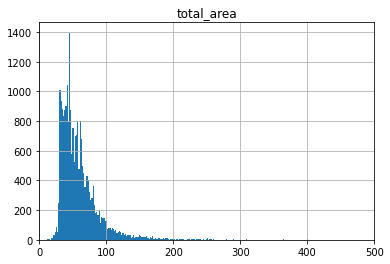

In [27]:
df.hist('total_area', bins=500)
plt.xlim(0, 500)

Мы видим здесь пик примерно на 60-70 кв.м, а также видим снижение около 120, это объясняется тем, что квартиры больше 120 кв.м не пользуются таким большим спросом в постройке квартир, всё-таки застройка в России ориентирована на 1,2,3ех комнатные квартиры, площадь которых варируется в среднем от 30 до 80 кв.м

count    2.341900e+04
mean     6.567031e+06
std      1.093315e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

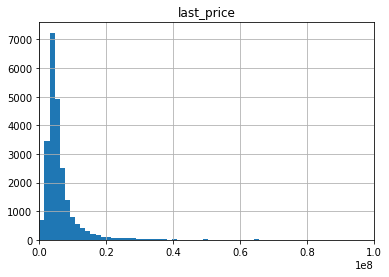

In [28]:
df.hist('last_price', bins=500)
plt.xlim(0,100000000)
df['last_price'].describe()

На данном графике мы видим, что пик в районе 5 млн, это подствержадется и описанием наших данных - медиана находится в районе 4,5 млн. График снижается ближе к 18 млн и практически выравнивается в районе 27 млн.

count    23419.000000
mean         2.088304
std          1.066164
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

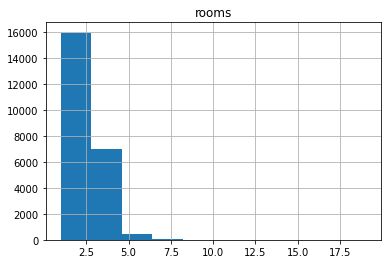

In [29]:
df.hist('rooms')
df['rooms'].describe()

Здесь мы видим, что пик находится в районе 1-2 комнат, что подтвержадется описанием наших данных. Именно такие комнаты пользуются спросом в типовой застройке, а вот 19 комнат - это больша редкость и, скорее всего, вброс.

count    23419.000000
mean         2.723608
std          0.981153
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

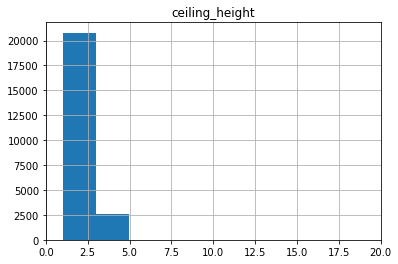

In [30]:
df.hist('ceiling_height', bins=50)
plt.xlim(0, 20)
df['ceiling_height'].describe()

Тут мы видим, что пик наших значений приходится на 1 метре, что очень страно, таких низких потолков не бывает. Мы запомним это значение и отметём в дальнейшей обработке.

Теперь рассчитаем время продажи квартиры.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

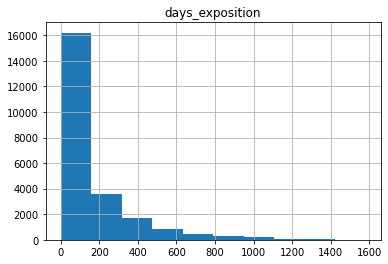

In [31]:
df.hist('days_exposition')

Мы видим пик около нуля, который выравнивается примерно около 180. Посчитаем, сколько таких занчений в этом столбце.

In [32]:
df.query('days_exposition <= 180')['days_exposition'].count()

17011

Около 70% процентов данных входят в этот пик, вряд ли можно с уверенностью сказать, что 70% людей продали свои квартиры меньше чем за 5 месяцев(хотя и такой возможно). Чтобы хоть как-то уровнять наши данные, отбросим те значения, в которых клиенты продали квартиры меньше чем за 15 дней. Также мы видим, что примерно около 1300, значения выравниваются, так что всё, что за этой границей, мы тоже отбросим.

In [33]:
df.query('days_exposition >= 15 & days_exposition <= 1300')['days_exposition'].describe()

count    18464.000000
mean       194.476062
std        214.386777
min         15.000000
25%         52.000000
50%        112.000000
75%        253.000000
max       1299.000000
Name: days_exposition, dtype: float64

Теперь мы видим, что в среднем вродажи проходят за 190-200 дней. Можно считать, что продажи прошли быстро, если они заняли менее 52 дней, а всё, что заняло больше 260 дней - уже достаточно долго. 

Теперь наша задача убрать редкие и выбивающиеся значения. По гистограммам выше мы заметили, что такие значения есть, а именно:
- в столбце total_area очень мало значений меньше 25 кв.м и больше 180 кв.м, поэтому всё, что выходит за эту границу мы отбросим.
- в столбце last_price мы видим пик около 5 млн, который снижается где-то в районе 18 млн и практически пропадает около 30 млн. Этой областью мы и ограничим наши значения. 
- в столбце rooms мы видим, что пик около 1-2ух комнатных квартир, а выравнивается он где-то ближе к 5, поэтому исключаем те данные, где количество комнат будет больше 5.
- в столбце ceiling_height есть такие занчения меньше 1 метра, таких потолков явно быть не может. Сегодня минимальной нормой в России считается высота потолка 2,4 метра, поэтому установим начальную границу на этом уровне. Также, мы видим, что максимальное значение высоты потолков 100м, что тоже невозможно. Ограничим высоту наших потолков от 2.4 до 4 метров.
- в столбце days_exposition мы приняли за выбивающиеся значения те, что будут меньше 30 и больше 1000.


Теперь создадим новый датафрэйм с "отчищенными" данными. После этого сравним данные старого и нового датафрейма, чтобы посмотреть, как изменились данные.

In [34]:
df2 = df.query('total_area >= 25 and total_area <= 180 and last_price <= 30000000 and rooms <=5 and days_exposition  >= 15 and days_exposition <= 1300 and distance_to_center > 0').reset_index(drop=True)
display(df.describe())
df2.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,distance_to_park,ponds_around3000,distance_to_pond,days_exposition,meter_price,day_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total
count,23419.000000,2.341900e+04,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000,...,23419.000000,23419.000000,23419.000000,23419.000000,2.341900e+04,23419.000000,23419.000000,23419.000000,23419.000000,23419.000000
mean,9.891370,6.567031e+06,60.597636,2.088304,2.723608,10.622273,34.460550,5.855288,10.461337,0.589479,...,167.816559,0.591272,198.977369,157.035271,9.932204e+04,2.566805,6.394466,2017.367095,0.563035,0.188180
std,5.683265,1.093315e+07,35.605453,1.066164,0.981153,6.569964,21.748593,4.853946,5.667640,0.959805,...,306.610392,0.885147,305.238507,213.855691,5.049480e+04,1.789602,3.492302,1.041399,0.110225,0.074130
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.018296
25%,6.000000,3.450000e+06,40.200000,1.000000,2.600000,5.000000,18.500000,2.000000,7.300000,0.000000,...,0.000000,0.000000,0.000000,22.000000,7.647059e+04,1.000000,3.000000,2017.000000,0.489819,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.500000,4.000000,9.040000,0.000000,...,0.000000,0.000000,0.000000,74.000000,9.487805e+04,3.000000,6.000000,2017.000000,0.565934,0.172840
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.900000,8.000000,11.500000,1.000000,...,303.000000,1.000000,389.000000,199.000000,1.140351e+05,4.000000,10.000000,2018.000000,0.636924,0.232877
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.514286,0.787879


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,distance_to_park,ponds_around3000,distance_to_pond,days_exposition,meter_price,day_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total
count,13801.000000,1.380100e+04,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,...,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000
mean,9.774726,6.250452e+06,58.739430,2.055721,2.719497,11.346207,33.361327,6.196218,10.363673,0.586842,...,213.512934,0.751250,257.698283,194.464387,104979.501030,2.579886,6.562858,2017.145207,0.559812,0.188213
std,5.641260,3.725786e+06,24.749862,0.952805,1.012192,6.604060,16.451155,4.994712,4.852011,0.960230,...,332.603367,0.925212,325.382045,215.167823,29916.407090,1.778906,3.461964,0.966729,0.106853,0.071283
min,0.000000,1.200000e+06,25.000000,1.000000,1.750000,1.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,15.000000,15345.268542,0.000000,1.000000,2014.000000,0.038462,0.043524
25%,6.000000,3.950000e+06,41.000000,1.000000,2.600000,5.000000,18.800000,3.000000,7.300000,0.000000,...,0.000000,0.000000,0.000000,54.000000,86000.000000,1.000000,3.000000,2017.000000,0.489567,0.134831
50%,9.000000,5.100000e+06,53.000000,2.000000,2.650000,9.000000,30.500000,5.000000,9.200000,0.000000,...,0.000000,0.000000,0.000000,112.000000,100000.000000,3.000000,7.000000,2017.000000,0.562874,0.173611
75%,14.000000,7.150000e+06,70.000000,3.000000,2.700000,16.000000,42.700000,8.000000,11.850000,1.000000,...,403.000000,1.000000,503.000000,252.000000,116891.891892,4.000000,10.000000,2018.000000,0.633838,0.232558
max,50.000000,3.000000e+07,180.000000,5.000000,100.000000,60.000000,140.000000,32.000000,65.000000,5.000000,...,3190.000000,3.000000,1344.000000,1299.000000,600000.000000,6.000000,12.000000,2019.000000,1.369925,0.787879


Мы видим, что после фильтрации значений наш датасет остался в пригодном виде для анализа, медиана сохранена в большинстве колонок, данные имеют хорошее распределение, поэтому делаем вывод, что с таким датафреймом можно рабоать и проводить анализ на основе этих данных.

Теперь определим, какие факторы флияют на стоимость квартиры. Для этого построим матрицу корреляции и деаграммы рассеевания для следующих параметров: зависимость цены от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. А также зависимость от даты размещения: дня недели, месяца и года.

,meter_price,rooms,last_price,distance_to_center
meter_price,1.000000,-0.127160,0.634196,-0.395110
rooms,-0.127160,1.000000,0.508939,-0.153177
last_price,0.634196,0.508939,1.000000,-0.353855
distance_to_center,-0.395110,-0.153177,-0.353855,1.000000


4460000.0
5200000.0
4990000.0


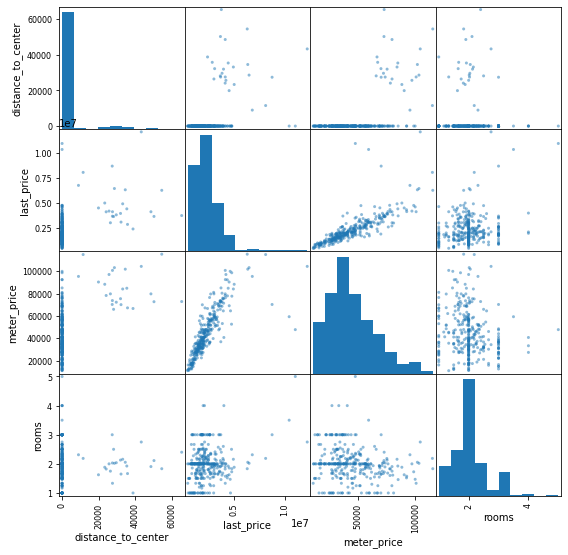

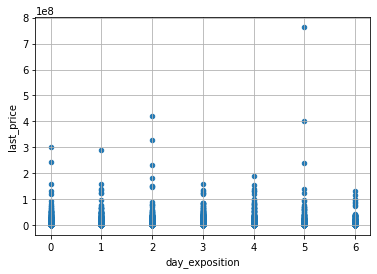

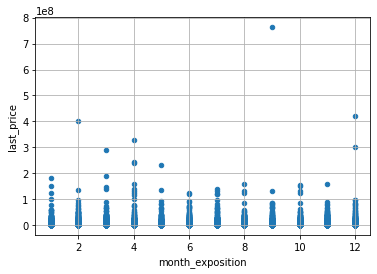

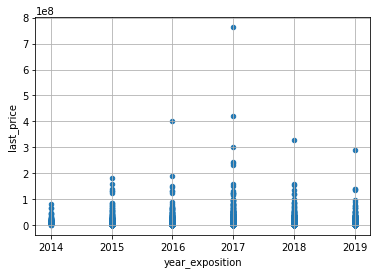

In [35]:
display(df2[['meter_price', 'rooms', 'last_price', 'distance_to_center']].corr())
important_values = df.pivot_table(index='city', values=['meter_price', 'rooms', 'last_price', 'distance_to_center'])
pd.plotting.scatter_matrix(important_values, figsize=(9, 9))
df.plot(x='day_exposition', y='last_price', kind='scatter', grid=True)
df.plot(x='month_exposition', y='last_price', kind='scatter', grid=True)
df.plot(x='year_exposition', y='last_price', kind='scatter', grid=True)
print(df2.query('floor_category == "первый"')['last_price'].median())
print(df2.query('floor_category == "другой"')['last_price'].median())
print(df2.query('floor_category == "последний"')['last_price'].median())

Как мы видим из графиков и корреляции, цена объекта находится в прямой зависимости от цены за кв.м и количества комнат, то есть чем выше становится один показатель, тем выше будет другой. Также мы видим обратную зависимость с удаленностью объекта от центра, то есть чем выше становится цена, тем меньше будет расстояние до центра. Если сравнивать цену и день недели, месяц и год, когда было выложено объявление, то можно увидеть, что объявления, которые были размещены во вторник и пятницу, имеют цену немного больше, чем те, что были размещены в остальные дни недели. А также в январе, апреле и июне, квартиры тоже продавались по большец стоимости. Такая же закономерность и с 2017 годом. В целом можно сказать, что отличия в цене небольшие, но они всё-таки есть.

Сравнив медиану по этажам и цене, мы видим, что объекты, расположенные на "последнем" и "другом" этаже стоят дороже, чем те, что располагаются на первом этаже. Это может быть объяснено тем, что первый этаж обычно называют "проходным", он находится на уровне глаз человека и люди с неохотой покупают квартиры на этом этаже. Последний же этаж, если в доме нет чердака, склонен к подтёкам с крыши, что тоже не устраивает потенциальных покупателей, отсюда и повышенная стоимость этажа категории "другой", он не имеет вышеперечисленных проблем.

Сейчас найдём топ 10 городов по количеству объявлений, чтобы узнать, сколько именно в них стоит 1 кв.м в среднем. Для этого отфильтруем значения и сделаем рассчёт.

In [36]:
top_10_city = df['city'].value_counts().head(10)

In [37]:
filtred_city = df[df['city'].isin(top_10_city.index)]

In [38]:
filtred_city.groupby('city')['meter_price'].mean().astype('int64')

city
Всеволожск            68618
Выборг                58141
Гатчина               68746
Колпино               75424
Пушкин               103125
Санкт-Петербург      114807
деревня Кудрово       92297
поселок Мурино        85029
поселок Парголово     90289
поселок Шушары        78277
Name: meter_price, dtype: int64

Как мы видим, самая большая цена за кв.м в Санкт-Петербурге(112 тысяч за кв.м), а самая маленька в Выборге(57 тысяч за кв.м)

Поскольку самая высокая стоимость за кв.м именно в Санкт-Петербурге, будет интересно посмотреть, как именно там распределяется цена, зависит ли она от центра, если да, то сколько стоит кв.м ближе и дальше от центра? Произведём рассчёты и проанализируем полученные данные. В первую очередь после получения среза разделим данные на 1000, поскольку данные в этом столбце указаны в метрах, а измерять удобнее будет в километрах.

<AxesSubplot:xlabel='distance_to_center'>

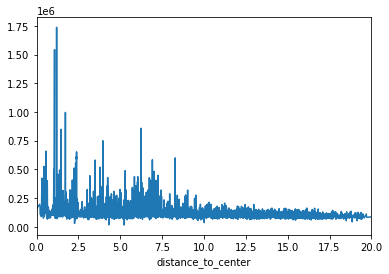

In [39]:
spb = df.query('city == "Санкт-Петербург"')
spb['distance_to_center'] = spb['distance_to_center']/1000
spb_center_distance = spb.groupby('distance_to_center')['meter_price'].mean().astype('int64')
spb_center_distance.plot(xlim=(0,20))

Как мы видим, на графике наблюдается резкое падение около 3км, но это слишком мало для такого большого города, как Санкт_Петербург. На графике мы также можем наблюдать падение около 7 км, поэтому область мы и ограничим как центр.

Теперь изучим эти самые квартиры в центре. Нужно проанализировать, какие именно квартиры там продают: какая у них высота потолков, цена, число комнат, площадь. Также изучим как на стоимость квартир в центре влияют число комнат, этаж, удалённость от центра, дата размещения объявления. Совпадет ли их влияние в остальных городах или мы увидим что-то новое?

,last_price,total_area,rooms,ceiling_height
count,3.343000e+03,3343.000000,3343.000000,3343.000000
mean,1.499934e+07,94.171914,2.864194,2.965124
std,2.464335e+07,60.208168,1.461694,0.751852
min,1.600000e+06,12.000000,1.000000,2.400000
25%,6.700000e+06,57.750000,2.000000,2.650000
50%,9.300000e+06,79.600000,3.000000,2.830000
75%,1.450000e+07,110.600000,4.000000,3.165000
max,7.630000e+08,631.200000,19.000000,32.000000


,distance_to_center,rooms,last_price
distance_to_center,1.000000,-0.128635,-0.042050
rooms,-0.128635,1.000000,0.313294
last_price,-0.042050,0.313294,1.000000


4899000.0
5650000.0


5680000.0

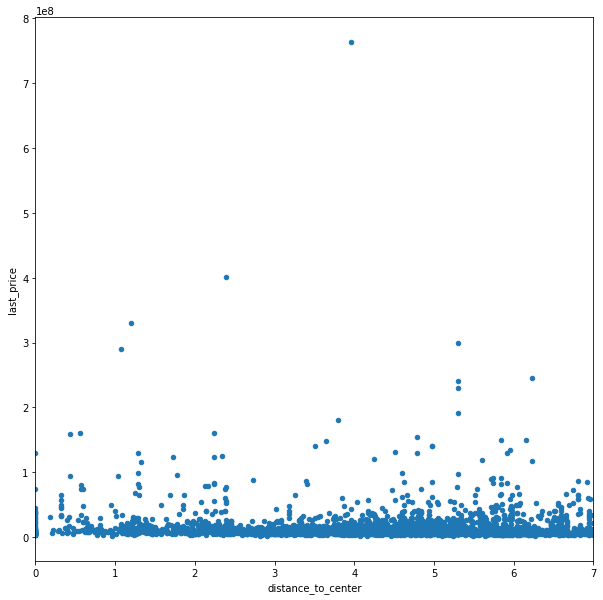

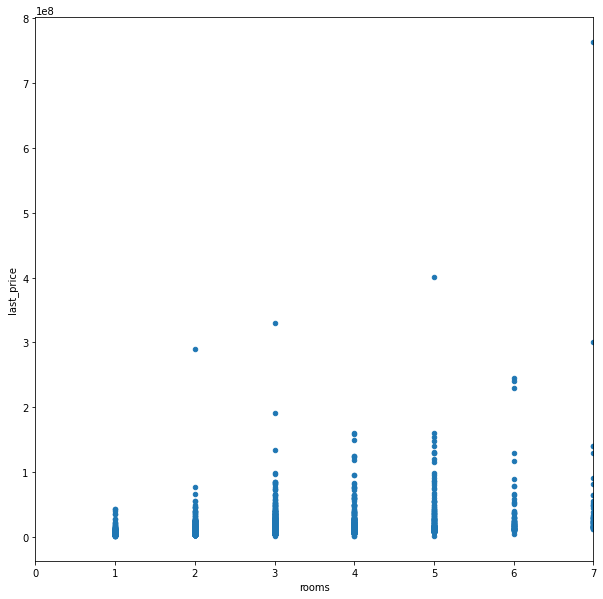

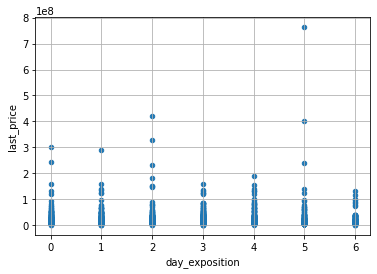

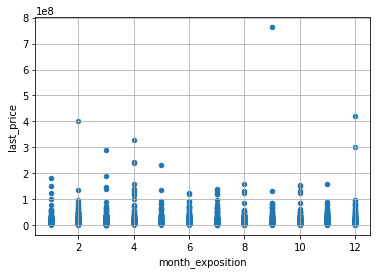

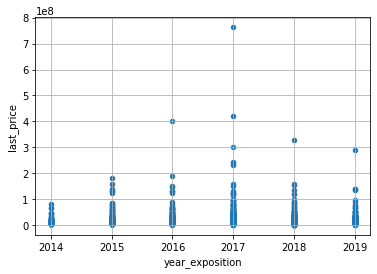

In [47]:
spb_center = spb.query('distance_to_center <= 7').reset_index(drop=True)
display(spb_center[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe())
display(spb_center[['distance_to_center', 'rooms', 'last_price']].corr())
spb_center.plot(y = 'last_price', 
        x = 'distance_to_center',         
        kind='scatter',
        s=20,
        xlim = (0,7),
        figsize=(10,10))
spb_center.plot(y = 'last_price', 
        x = 'rooms',         
        kind='scatter',
        s=20,
        xlim = (0,7),
        figsize=(10,10))
spb.plot(x='day_exposition', y='last_price', kind='scatter', grid=True)
spb.plot(x='month_exposition', y='last_price', kind='scatter', grid=True)
spb.plot(x='year_exposition', y='last_price', kind='scatter', grid=True)
print(spb.query('floor_category == "первый"')['last_price'].median())
print(spb.query('floor_category == "другой"')['last_price'].median())
spb.query('floor_category == "последний"')['last_price'].median()

Как мы видим из первой таблицы, в центре в большинство квартир имеют площадь больше 70 кв.м, 3 комнаты, высота потолков равна приблизительно 3м, а цена на них по большей части составляет от 7млн. 

Что касается изучения зависимости, то тут можно отметить следующее: факторы, которые влияют на цену, остались весомыми и здесь. Мы видим, что самые дорогие квартиры всё также публикуются во вторник и пятницу, в январе, апреле и июне, а также в 2017 году. На цену по-прежнему влияет удалённость от центра(на графике видно, чем ближе к центру, тем цена становится выше), число комнат(самые дорогие это 4 и более комнат), а также этаж из категории "другой" остаётся самым дорогим.

## Общий вывод

В данном исследовании мы изучили рынок недвижимости в Санкт-Петербурге и близлижащих городах и посёлках. Вывели те факторы, которые напрямую влияют на стоимость квартиры(число комнат, цена за кв.м, этаж), выснили, что цена находится в обратной зависимости от удалённости от центра(чем дальше квартира, тем меньше цена). Также, мы произвели анализ квартир в Санкт-Петербурге в районе центра(3 км) и выяснили, что там эти факторы также играют большую роль, но решающим всё-таки будет близость к центру, остальные факторы являются сопуствующими. 